In [318]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import time


1, In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

### When to use ML
Machine learning is used in different sectors as starting from retail and finance, through health care, to education and charity. Each of them adjusts it to its needs. Google uses ML, for instance, in the Gmail spam filter, Apple - in its personal assistant, Siri. Machine learning helps banks detect suspicious transactions and allows insurance companies to calculate risk more accurately. Machine learning is beloved by ecommerce and marketing: Amazon, Netflix and hundreds of online shops built their recommendation engines on it. Hedge funds, such as Two Sigma or Binatix, have ML algorithms which forecast stock prices. The medical company Medecision uses ML to predict avoidable hospitalizations in diabetes patients, Schneider Electric to prevent oil and gas pumps from failure, and the Zoological Society of London to track endangered animals in photos taken in Africa.ML is used in classification, clustering, regression, dimensionality reduction.

### When not to use ML
Not having enough data: when we don't have enough data Machine Learning is designed to work with huge amounts of data. Really huge. 100k records is a good start. If the training data set is too small, then the system's decisions will be biased.
Data are too noisy:"Noise" in ML is the irrelevant information in a dataset. If there is too much of it, the computer might memorise noise.
You don't have much time (and money): ML is time- and resource-intensive. First, data scientists need to prepare a dataset. Then, the computer needs some time to learn. Then the IT team performs test and adjusts the algorithm. Then, the computer needs some time to learn, again. IT does some testing, and adjusts the algorithm. The computer goes back to learning... The cycle repeats over and over again. The more time is needed, the more you need to pay IT specialists.


2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note:you should use at least three different techniques.

### We have 6 pre-processing techniques, they are 
1, Cleaning up null values 

2, Data cleaning(dashes, odd characters, etc.)

3, One-Hot encoding

4, Convert catergorical values to numerical

5, Standardization/normalization

6, Deal with multicollinearity 

### I used Cleaning up null values , One-Hot encoding and Standardization

In [2]:
df = pd.read_csv("loans_full_schema.csv")
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


### Cleaning up null values 

In [238]:
# Cleaning up null values says that we have to remove the nan values within the dataframe, i used dropna which helps us to drop nan columns 
df_without_NaN = df.dropna()

In [239]:
df_without_NaN

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,...,C4,Mar-2018,In Grace Period,whole,Cash,23455.27,1102.83,544.73,558.10,0.0
99,owner,10.0,MN,MORTGAGE,23000.0,Verified,49.58,98000.0,Verified,19.87,...,D4,Feb-2018,Current,whole,Cash,14395.45,1572.97,604.55,968.42,0.0
130,military officer captain,10.0,GA,RENT,145000.0,Verified,14.66,155000.0,Source Verified,14.98,...,A3,Feb-2018,Current,whole,Cash,35942.19,4890.01,4057.81,832.20,0.0
214,realtor / assistant,5.0,NJ,MORTGAGE,80000.0,Not Verified,18.39,125000.0,Not Verified,11.77,...,B1,Jan-2018,Current,whole,Cash,13068.02,1460.76,931.98,528.78,0.0
352,manager,10.0,TX,MORTGAGE,120000.0,Verified,7.81,198000.0,Verified,15.15,...,A4,Jan-2018,Current,whole,Cash,21847.54,3859.28,3152.46,706.82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,management,10.0,AZ,MORTGAGE,88000.0,Source Verified,32.28,136000.0,Source Verified,24.13,...,B3,Jan-2018,Current,whole,Cash,17414.85,1987.17,1210.15,777.02,0.0
9877,charger operator,9.0,MN,MORTGAGE,31000.0,Verified,1.94,94300.0,Verified,15.41,...,B5,Jan-2018,Current,whole,Cash,11250.27,1326.41,749.73,576.68,0.0
9880,truck driving,10.0,MN,MORTGAGE,112000.0,Source Verified,18.60,172000.0,Source Verified,20.84,...,B3,Jan-2018,Current,whole,Cash,28447.40,2557.15,1552.60,1004.55,0.0
9893,teacher,10.0,NJ,MORTGAGE,60000.0,Source Verified,31.18,180000.0,Source Verified,31.73,...,D3,Mar-2018,Current,whole,Cash,35603.47,4162.06,2396.53,1765.53,0.0


In [6]:
print(df_without_NaN.columns.tolist())

['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income', 'verified_income', 'debt_to_income', 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq', 'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines', 'total_credit_limit', 'total_credit_utilized', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'months_since_90d_late', 'current_accounts_delinq', 'total_collection_amount_ever', 'current_installment_accounts', 'accounts_opened_24m', 'months_since_last_credit_inquiry', 'num_satisfactory_accounts', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance', 'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt', 'loan_purpose', 'application_type', 'loan_amount', 'term', 'interest_rate', 'installment', 'grade'

In [17]:
print(df_without_NaN["loan_amount"])

37      24000
99      15000
130     40000
214     14000
352     25000
        ...  
9821    18625
9877    12000
9880    30000
9893    38000
9956     6800
Name: loan_amount, Length: 201, dtype: int64


### One-Hot encoding 

In [7]:
#Here i took issue month column as it is categorical data so it changed to numerical data. i also wanted to see how many months are inculded in the dataframe so used uniques to get all months.
issue_month_OHE, uniques = pd.factorize(df_without_NaN["issue_month"])

In [40]:
print(issue_month_OHE)
print(uniques)


[0 1 1 2 2 0 2 1 2 1 0 0 2 1 0 0 0 0 2 1 1 1 2 2 0 1 2 0 1 0 1 0 0 2 0 1 0
 2 2 1 2 2 2 0 2 1 2 1 2 0 0 0 1 0 0 2 1 0 0 2 2 2 0 1 2 0 0 1 2 0 0 0 2 2
 2 1 2 0 1 1 1 2 0 2 2 0 2 0 2 2 1 1 2 0 2 1 2 1 1 0 2 2 2 0 2 0 2 1 2 0 1
 0 2 2 0 0 2 1 1 2 1 1 0 2 1 0 0 0 2 2 1 0 0 0 2 1 0 0 2 1 0 2 0 1 2 0 1 2
 2 1 0 1 1 1 1 2 2 1 1 2 1 2 0 0 1 0 1 0 1 0 2 2 2 2 1 1 0 0 0 1 0 0 1 0 2
 0 2 2 0 2 2 0 2 2 1 0 2 2 2 0 2]
Index(['Mar-2018', 'Feb-2018', 'Jan-2018'], dtype='object')


### Standardization/Normalization

In [8]:
df_without_NaN[['balance_Standardization', 'paid_total_Standardization']] = StandardScaler().fit_transform(df_without_NaN[['balance', 'paid_total']])
df_without_NaN

<ipython-input-8-a6126043ce91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_NaN[['balance_Standardization', 'paid_total_Standardization']] = StandardScaler().fit_transform(df_without_NaN[['balance', 'paid_total']])
/Users/anushakatta/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,balance_Standardization,paid_total_Standardization
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,...,In Grace Period,whole,Cash,23455.27,1102.83,544.73,558.10,0.0,0.533642,-0.653584
99,owner,10.0,MN,MORTGAGE,23000.0,Verified,49.58,98000.0,Verified,19.87,...,Current,whole,Cash,14395.45,1572.97,604.55,968.42,0.0,-0.308148,-0.375050
130,military officer captain,10.0,GA,RENT,145000.0,Verified,14.66,155000.0,Source Verified,14.98,...,Current,whole,Cash,35942.19,4890.01,4057.81,832.20,0.0,1.693861,1.590129
214,realtor / assistant,5.0,NJ,MORTGAGE,80000.0,Not Verified,18.39,125000.0,Not Verified,11.77,...,Current,whole,Cash,13068.02,1460.76,931.98,528.78,0.0,-0.431486,-0.441528
352,manager,10.0,TX,MORTGAGE,120000.0,Verified,7.81,198000.0,Verified,15.15,...,Current,whole,Cash,21847.54,3859.28,3152.46,706.82,0.0,0.384261,0.979474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,management,10.0,AZ,MORTGAGE,88000.0,Source Verified,32.28,136000.0,Source Verified,24.13,...,Current,whole,Cash,17414.85,1987.17,1210.15,777.02,0.0,-0.027602,-0.129657
9877,charger operator,9.0,MN,MORTGAGE,31000.0,Verified,1.94,94300.0,Verified,15.41,...,Current,whole,Cash,11250.27,1326.41,749.73,576.68,0.0,-0.600382,-0.521124
9880,truck driving,10.0,MN,MORTGAGE,112000.0,Source Verified,18.60,172000.0,Source Verified,20.84,...,Current,whole,Cash,28447.40,2557.15,1552.60,1004.55,0.0,0.997485,0.208027
9893,teacher,10.0,NJ,MORTGAGE,60000.0,Source Verified,31.18,180000.0,Source Verified,31.73,...,Current,whole,Cash,35603.47,4162.06,2396.53,1765.53,0.0,1.662389,1.158855


3, Create a correlation martrix with a heatmap for the features in the lending club dataset. Use markdown to write about your takeways in under 250 words 

* i found that this correlation heatmap eliminates columns which will be of no use while generating a correlation heatmap and selects those which can be used.
* lighter color means positive, dark means negative. The stronger the color, the larger the correlation magnitude
* This map shows the highest correlation and lowest correlation. as we have a large data set it is hard to see the numerical values on the heatmap.


In [312]:
corr_matrix = df_without_NaN.corr()
corr_matrix

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Test
emp_length,1.000000,0.169817,-0.137558,0.026200,0.020197,-0.027395,0.110214,-0.098302,-0.092515,-0.041645,...,0.080300,0.048471,-0.071673,0.036386,0.075493,0.047596,0.060333,-0.010900,-0.105259,NaN
annual_income,0.169817,1.000000,-0.280191,0.718367,-0.178499,-0.029384,0.031119,-0.068020,-0.018368,0.107728,...,0.241732,0.188675,-0.214331,0.125106,0.239842,0.101808,0.088182,0.069506,0.003143,NaN
debt_to_income,-0.137558,-0.280191,1.000000,0.059522,0.161628,-0.005175,-0.008219,-0.114086,0.073929,0.197817,...,0.059406,-0.123217,0.019362,0.122825,0.053817,0.065363,0.059729,0.037551,-0.014569,NaN
annual_income_joint,0.026200,0.718367,0.059522,1.000000,-0.265198,-0.001724,-0.041806,-0.118299,0.018015,0.188425,...,0.319454,0.126303,-0.207292,0.235967,0.299234,0.250866,0.248166,0.100638,0.033112,NaN
debt_to_income_joint,0.020197,-0.178499,0.161628,-0.265198,1.000000,0.044085,0.030160,-0.079809,-0.030379,0.125035,...,0.044825,0.041736,0.245511,0.100630,0.058875,-0.009468,-0.090609,0.181834,0.019856,NaN
delinq_2y,-0.027395,-0.029384,-0.005175,-0.001724,0.044085,1.000000,-0.576158,-0.049905,0.039601,-0.052312,...,0.057611,-0.087918,0.080210,0.113471,0.040150,0.165612,0.147370,0.104200,-0.033790,NaN
months_since_last_delinq,0.110214,0.031119,-0.008219,-0.041806,0.030160,-0.576158,1.000000,0.019888,-0.112450,-0.005976,...,-0.014952,0.098675,-0.103453,-0.069341,0.008398,-0.171426,-0.178022,-0.049511,-0.009264,NaN
earliest_credit_line,-0.098302,-0.068020,-0.114086,-0.118299,-0.079809,-0.049905,0.019888,1.000000,-0.002922,-0.224647,...,-0.136697,-0.015441,0.123100,-0.135088,-0.131569,-0.107006,-0.080010,-0.102110,0.029506,NaN
inquiries_last_12m,-0.092515,-0.018368,0.073929,0.018015,-0.030379,0.039601,-0.112450,-0.002922,1.000000,0.103146,...,-0.031508,0.138759,0.278520,-0.025799,-0.018702,-0.053751,-0.104781,0.096203,0.066437,NaN
total_credit_lines,-0.041645,0.107728,0.197817,0.188425,0.125035,-0.052312,-0.005976,-0.224647,0.103146,1.000000,...,0.215445,0.105034,-0.051921,0.181483,0.219018,0.087817,0.039541,0.143131,0.117887,NaN


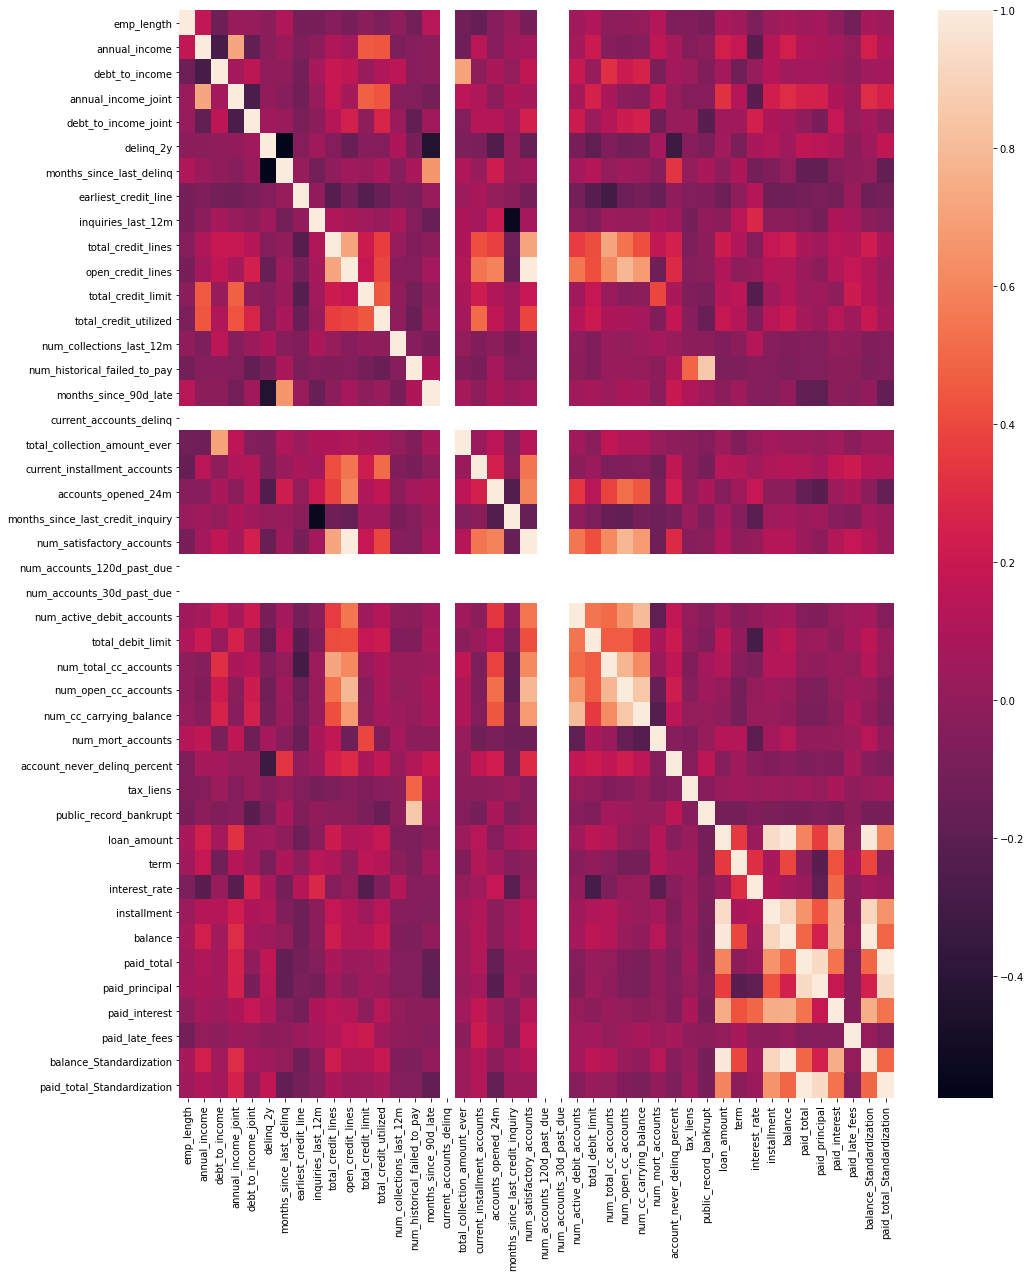

In [15]:
plt.figure(figsize = (16,20))
ax = sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

4, Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you choose your bin sizes.

* As the data size is small i took bin size with the maximum number. i pulled the lowest and highest number from the data and created bin with the highest number as i wanted to show clear hist where the number is missing. i found that there is no frequency at 9 and 12 values and i wanted to show it clearly on hist so i have assigned bin to 14 which showed the missing frequency as empty on the hist fig.

In [279]:
loan_amt_freq = df_without_NaN["loan_amount"].value_counts()
loan_amt_freq

20000    14
40000    13
10000    11
12000    10
15000     8
         ..
3000      1
1925      1
11400     1
6025      1
9600      1
Name: loan_amount, Length: 76, dtype: int64

In [231]:
loan_amt_freq.min()

1

In [232]:
loan_amt_freq.max()

14

(array([40., 18.,  4.,  1.,  2.,  1.,  3.,  3.,  0.,  1.,  1.,  0.,  1.,
         1.]),
 array([ 1.        ,  1.92857143,  2.85714286,  3.78571429,  4.71428571,
         5.64285714,  6.57142857,  7.5       ,  8.42857143,  9.35714286,
        10.28571429, 11.21428571, 12.14285714, 13.07142857, 14.        ]),
 <BarContainer object of 14 artists>)

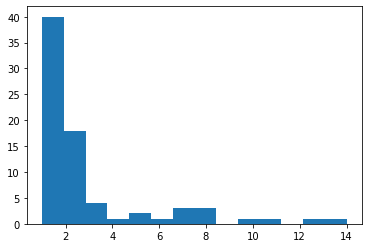

In [236]:
plt.hist(loan_amt_freq, bins =14)

5, Create a new coulmn called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Norteast, and South. Consider having your lambda call a function 

a, Is there a better way to do this than with a lambda?

b, Either use two different lambda or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

Norteast: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island and Vermont

Mideast: Delaware, District of Columbia, Maryland, New Jersey, New York and Pennsylvania

Midwest: Illinois, Indiana, Michigan, Ohio and Wisconsin

Plains: Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota and South Dakota

Southeast: Alabama, Arkansas, Florida, Georgia, Kentucky, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Virginia and West Virginia

Southwest: Arizona, New Mexico, Oklahoma and Texas

Rocky Mountain: Colorado, Idaho, Montana, Utah and Wyoming

Pacific: Alaska, California, Hawaii, Nevada, Oregon and Washington

In [385]:
regions ={'NJ':"Mideast", 'MN':"Plains", 'GA':"Southeast", 'TX':"Southwest", 'CA':"Pacific", 'SC':"Southeast", 'VA':"Southeast", 'WA':"Pacific", 'IN':"Midwest", 'MA':"Norteast", 'FL':"Southeast",
'ID':"Rocky Mountain", 'NV':"Pacific", 'AZ':"Southwest", 'OR':"Pacific", 'CT':"Norteast", 'PA':"Mideast", 'CO':"Rocky Mountain", 'NC':"Southeast", 'MO':"Plains", 'IL':"Midwest", 'OH':"Midwest",
'AL':"Southeast", 'UT':"Rocky Mountain", 'TN':'Southeast', 'NY':"Mideast", 'KS':"Plains", 'MI':"Midwest", 'OK':"Southwest", 'MD':"Mideast", 'AR':"Southeast", 'KY':"Southeast", 'VT':"Norteast",
'MT':"Rocky Mountain", 'NH':"Norteast", 'NE':"Plains", 'WV':"Southeast", 'WI':"Midwest", 'RI':"Norteast", 'MS':"Southeast", 'SD':"Plains", 'LA':"Southeast", 'HI':"Pacific", 'NM':"Southwest"}

regions

{'NJ': 'Mideast',
 'MN': 'Plains',
 'GA': 'Southeast',
 'TX': 'Southwest',
 'CA': 'Pacific',
 'SC': 'Southeast',
 'VA': 'Southeast',
 'WA': 'Pacific',
 'IN': 'Midwest',
 'MA': 'Norteast',
 'FL': 'Southeast',
 'ID': 'Rocky Mountain',
 'NV': 'Pacific',
 'AZ': 'Southwest',
 'OR': 'Pacific',
 'CT': 'Norteast',
 'PA': 'Mideast',
 'CO': 'Rocky Mountain',
 'NC': 'Southeast',
 'MO': 'Plains',
 'IL': 'Midwest',
 'OH': 'Midwest',
 'AL': 'Southeast',
 'UT': 'Rocky Mountain',
 'TN': 'Southeast',
 'NY': 'Mideast',
 'KS': 'Plains',
 'MI': 'Midwest',
 'OK': 'Southwest',
 'MD': 'Mideast',
 'AR': 'Southeast',
 'KY': 'Southeast',
 'VT': 'Norteast',
 'MT': 'Rocky Mountain',
 'NH': 'Norteast',
 'NE': 'Plains',
 'WV': 'Southeast',
 'WI': 'Midwest',
 'RI': 'Norteast',
 'MS': 'Southeast',
 'SD': 'Plains',
 'LA': 'Southeast',
 'HI': 'Pacific',
 'NM': 'Southwest'}

In [386]:
df_without_NaN['lambda_func_region'] = df_without_NaN.apply(lambda n: regions if n['state'] == regions else False, axis=1)
df_without_NaN

<ipython-input-386-f70129b6ca03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_NaN['lambda_func_region'] = df_without_NaN.apply(lambda n: regions if n['state'] == regions else False, axis=1)


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region,Region,lambda_func_region
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,...,whole,Cash,23455.27,1102.83,544.73,558.10,0.0,Mideast,Mideast,False
99,owner,10.0,MN,MORTGAGE,23000.0,Verified,49.58,98000.0,Verified,19.87,...,whole,Cash,14395.45,1572.97,604.55,968.42,0.0,Plains,Plains,False
130,military officer captain,10.0,GA,RENT,145000.0,Verified,14.66,155000.0,Source Verified,14.98,...,whole,Cash,35942.19,4890.01,4057.81,832.20,0.0,Southeast,Southeast,False
214,realtor / assistant,5.0,NJ,MORTGAGE,80000.0,Not Verified,18.39,125000.0,Not Verified,11.77,...,whole,Cash,13068.02,1460.76,931.98,528.78,0.0,Mideast,Mideast,False
352,manager,10.0,TX,MORTGAGE,120000.0,Verified,7.81,198000.0,Verified,15.15,...,whole,Cash,21847.54,3859.28,3152.46,706.82,0.0,Southwest,Southwest,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,management,10.0,AZ,MORTGAGE,88000.0,Source Verified,32.28,136000.0,Source Verified,24.13,...,whole,Cash,17414.85,1987.17,1210.15,777.02,0.0,Southwest,Southwest,False
9877,charger operator,9.0,MN,MORTGAGE,31000.0,Verified,1.94,94300.0,Verified,15.41,...,whole,Cash,11250.27,1326.41,749.73,576.68,0.0,Plains,Plains,False
9880,truck driving,10.0,MN,MORTGAGE,112000.0,Source Verified,18.60,172000.0,Source Verified,20.84,...,whole,Cash,28447.40,2557.15,1552.60,1004.55,0.0,Plains,Plains,False
9893,teacher,10.0,NJ,MORTGAGE,60000.0,Source Verified,31.18,180000.0,Source Verified,31.73,...,whole,Cash,35603.47,4162.06,2396.53,1765.53,0.0,Mideast,Mideast,False


In [387]:
start = time.time()

df_without_NaN['region'] = df_without_NaN['state'].map(regions)
df_without_NaN

end = time.time()
print(end-start)

0.0037741661071777344


<ipython-input-387-75a37b8847ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_NaN['region'] = df_without_NaN['state'].map(regions)


In [388]:
start = time.time()

def changing_to_region(state):
    return regions[state]

df_without_NaN['Region'] = df_without_NaN['state'].apply(changing_to_region)
df_without_NaN

end = time.time()
print(end-start)

0.002244710922241211


<ipython-input-388-d9b943ef57da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_NaN['Region'] = df_without_NaN['state'].apply(changing_to_region)


6, Create subplot histograms to show if loan_amounts differ by region. Summerrize your findings.

In [273]:
#I took the average for the group region so that we will get know the the avg loan amout for particular region 
new_df = df_without_NaN.groupby('Region')['loan_amount'].mean()
new_df

Region
Mideast           20203.448276
Midwest           17037.500000
Norteast          19830.769231
Pacific           18034.677419
Plains            27352.272727
Rocky Mountain    18202.272727
Southeast         17768.636364
Southwest         20397.000000
Name: loan_amount, dtype: float64

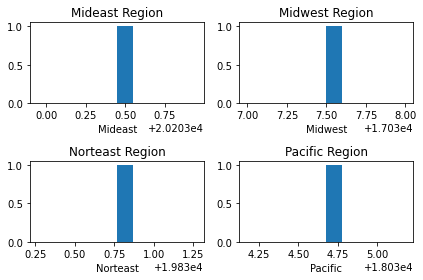

In [277]:
xaxes = ['Mideast','Midwest','Norteast','Pacific']
titles = ['Mideast Region','Midwest Region','Norteast Region','Pacific Region'] 

f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(new_df[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
plt.tight_layout()

### found that there is slight difference in the loan amount according to the region. on above plot i showed histogram for Mideast, Midwest, Norteast and Pacific regions. as the plots shows that hist bar is at different rates on the x axis that means the loan amounts are not same for all 4 regions and they are different from each other.

7, Think of some questions you wwant to ask our guests next week. You can ask then anything just make sure its thoughtfull

### Machine Learning for Business

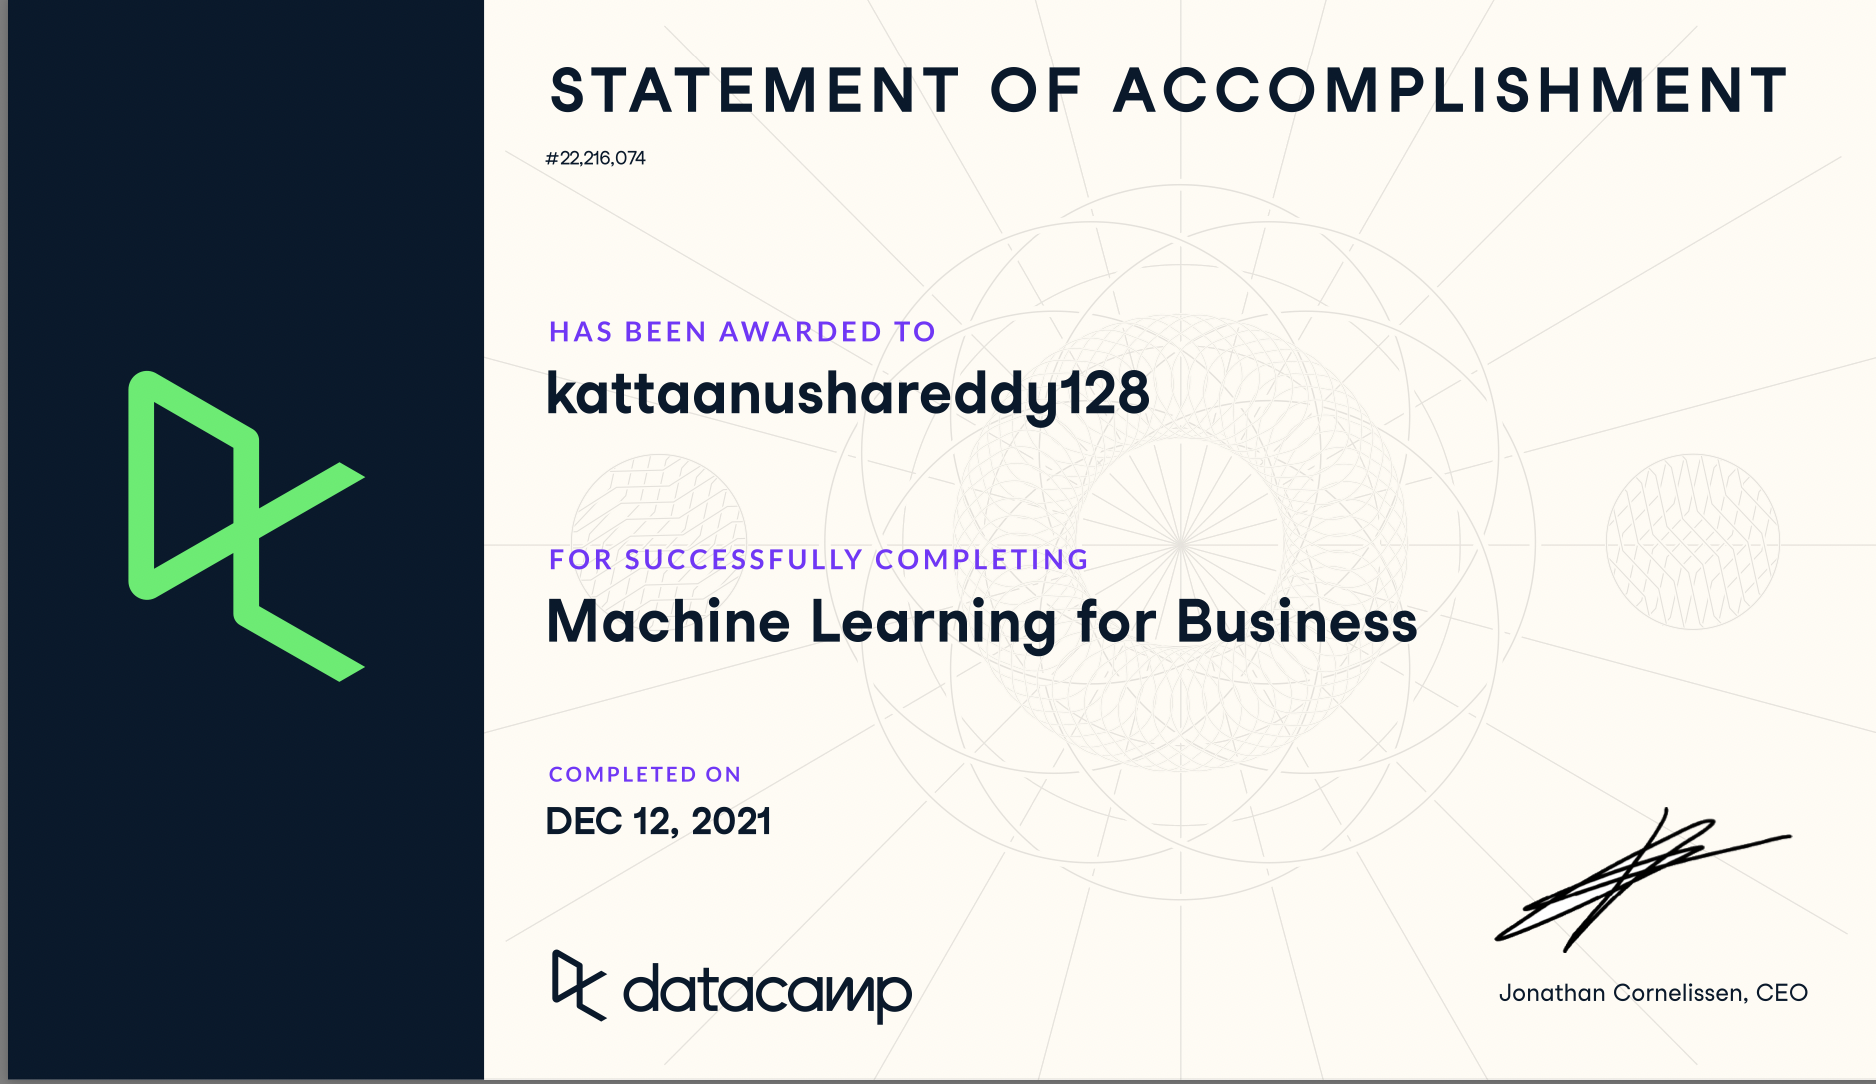

### Python Data Science Toolbox(part 1)

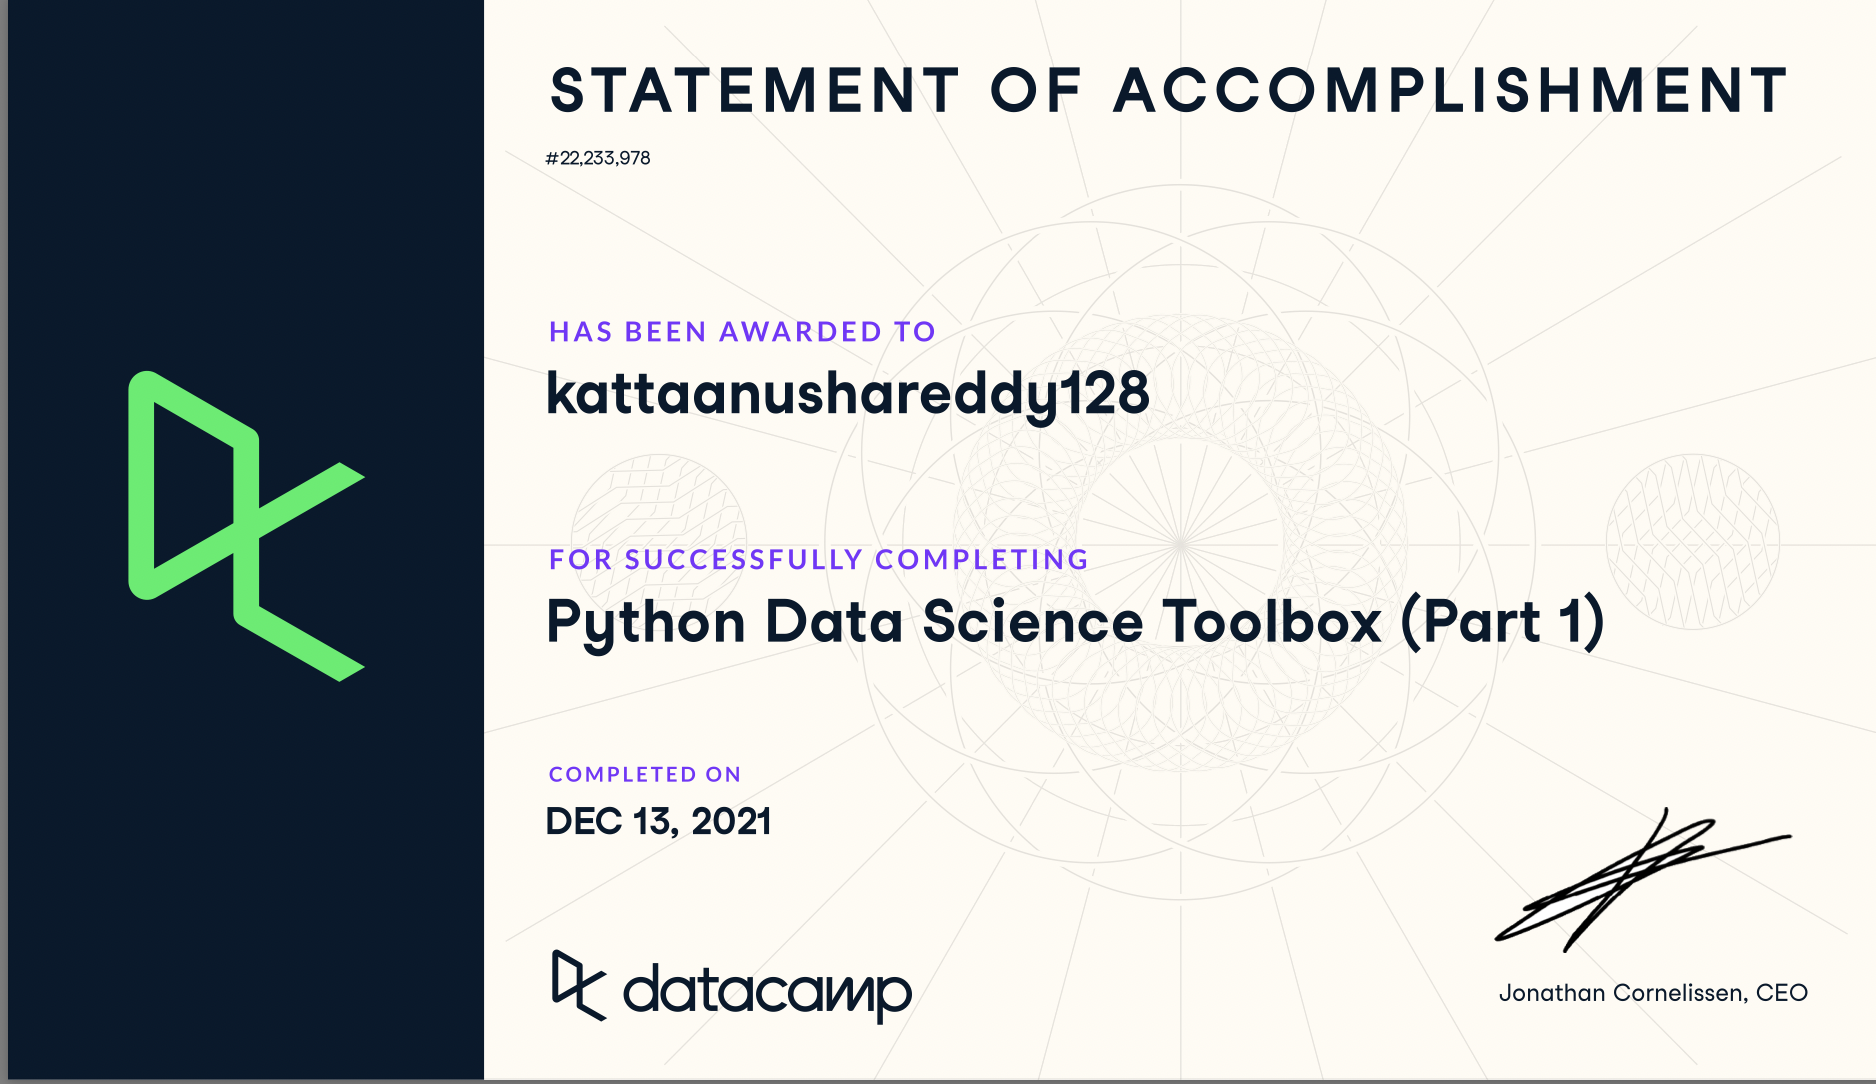